# Two moons (conditional)

We learn the two moons distribution, conditioned on the class label.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from neural_flow import Flow, train
from neural_flow.bijectors import rolling_spline_coupling
import jax

  0%|          | 0/200 [00:00<?, ?it/s]

0.3397289514541626


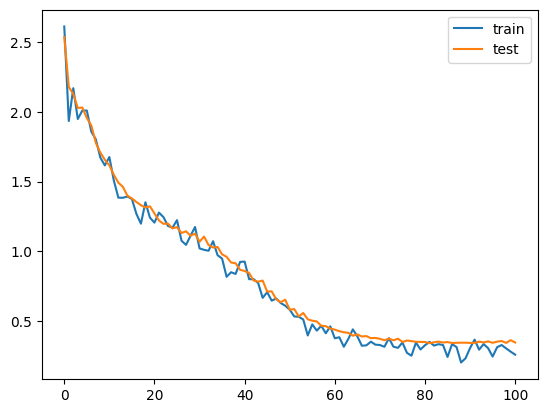

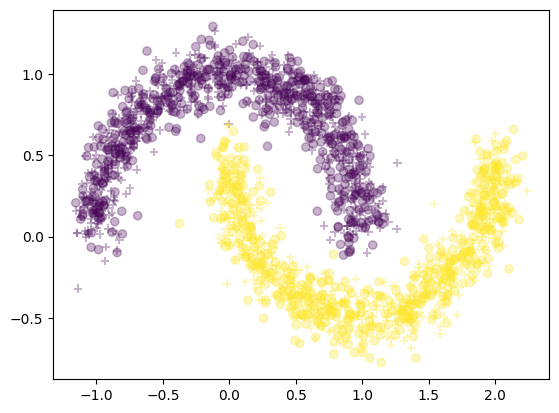

In [5]:
X, C = make_moons(10_000, noise=0.1, random_state=1)
X_train, X_test, C_train, C_test = train_test_split(X, C, random_state=1)

flow = Flow(rolling_spline_coupling(2))

variables, best_epoch, train_losses, test_losses = train(
    flow,
    X_train,
    X_test,
    C_train,
    C_test,
    epochs=200,
)
print(test_losses[best_epoch])

plt.figure()
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.legend()

Cm = C_test[:1000]
Xm = flow.apply(variables, Cm, method="sample")

plt.figure()
plt.scatter(*Xm.T, c=Cm, marker="o", alpha=0.3)
plt.scatter(*X_test[:1000].T, c=C_test[:1000], marker="+", alpha=0.3);

The following shows how the latent distribution is successively transformed into the target distribution by the bijectors applied in reverse.

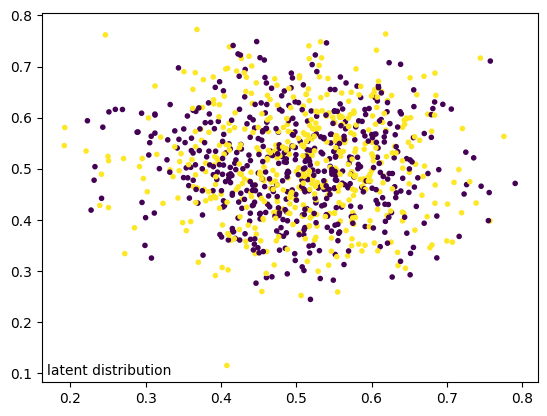

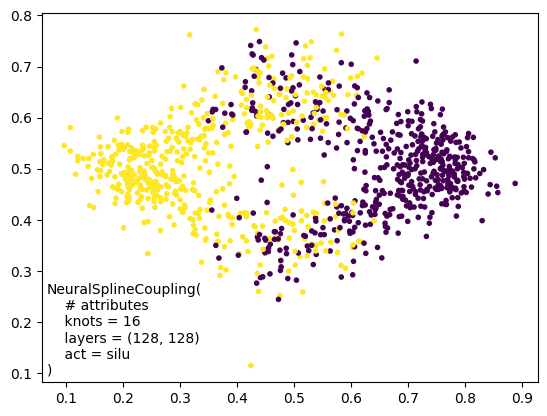

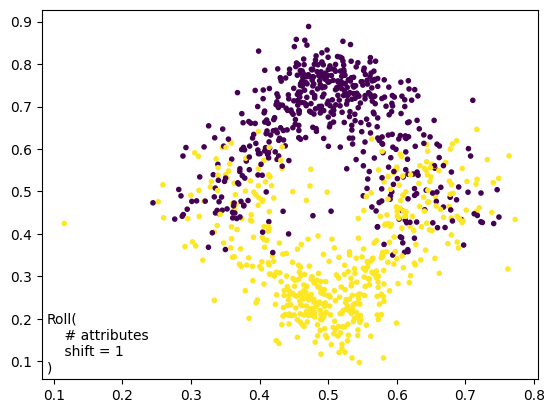

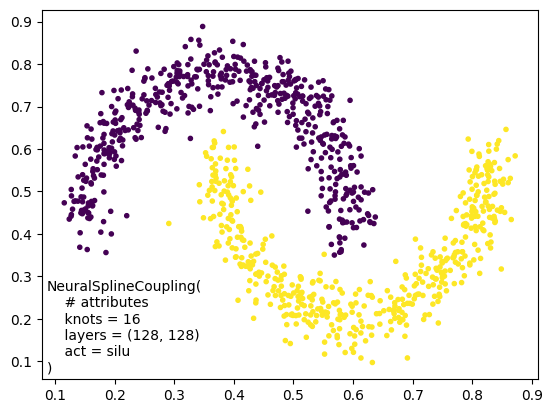

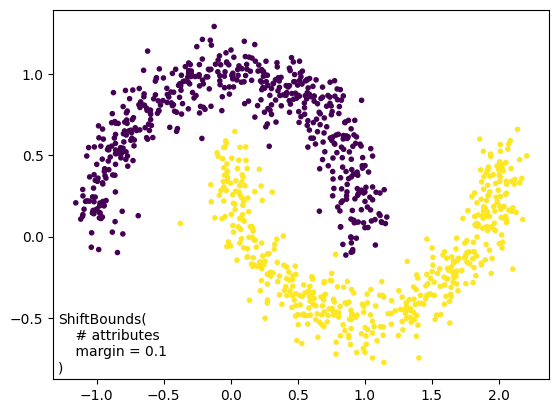

In [6]:
size = 1000
x = flow.latent.sample(size, jax.random.PRNGKey(0))

plt.figure()
plt.scatter(*x.T, marker=".", c=Cm)
plt.text(0.01, 0.02, "latent distribution", transform=plt.gca().transAxes)

for bi, x in zip(
    flow.bijector[::-1],
    flow.apply(variables, x, Cm, inverse=True, method="_steps"),
):
    plt.figure()
    plt.text(0.01, 0.02, f"{bi!r}", transform=plt.gca().transAxes)
    plt.scatter(*x.T, marker=".", c=Cm)